# Diving into Gradient Descent

This notebook provides the code to accompany the tutorial Diving into Gradient Descent.

In [1]:
#to show matplotlib graphs in ipython notebook
%matplotlib inline

#standard imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#function to caculate f and f prime
def f(x):
    return(x**2 - 4*x + 3)

def derivative(x):
    return (2*x -4)

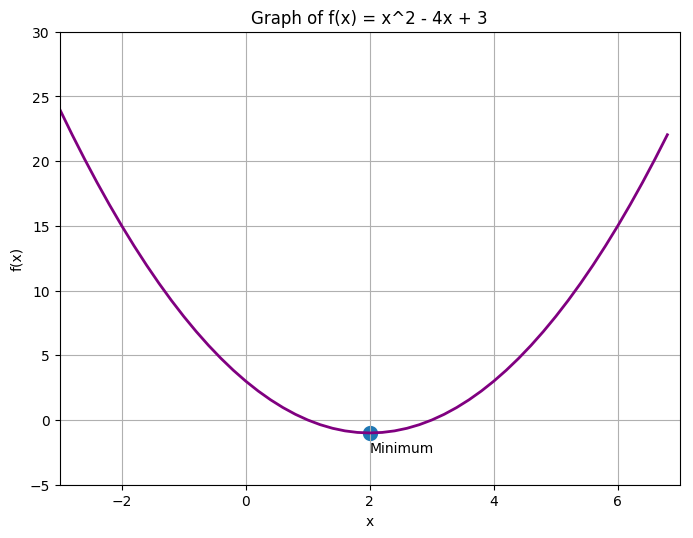

In [3]:
#####  Code for initial graph of the function

# array of x values to plot, from -3 to 7
x_s = np.arange(-3., 7., 0.2)
# applying function to x values to find ys to graph
y_s = f(x_s)

# initializing figure, 8 by 6 inches
fig = plt.figure(figsize=(8, 6), dpi=100)

# adding axis labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 3')
# adding gridlines for readability
plt.grid(True)

# restricting axis values, optional
plt.xlim((-3,7))
plt.ylim((-5,30))

# basic graphing format is plot(x, y), adding color and lw to thicken line
plt.plot(x_s, y_s, color ='purple', lw=2)

# overlaying a scatter plot of one point, the minimum
plt.text(2, -2.5, r'Minimum')
plt.scatter(2, f(2), linewidth=5)

#plt.show()
# save command, to export graph to a file
plt.savefig('graph.png')

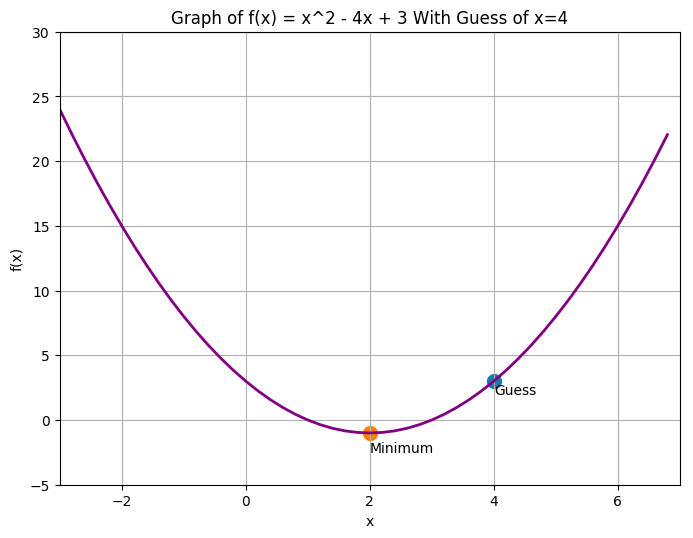

In [4]:
#####  Code for graph with initial guess

# array of x values to plot, from -3 to 7
x_s = np.arange(-3., 7., 0.2)
# applying function to x values to find ys to graph
y_s = f(x_s)

# initializing figure, 8 by 6 inches
fig = plt.figure(figsize=(8, 6), dpi=100)

# adding axis labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 3 With Guess of x=4')
# adding gridlines for readability
plt.grid(True)

# restricting axis values
plt.xlim((-3,7))
plt.ylim((-5,30))

# basic graphing format is plot(x, y), adding color and lw to thicken line
plt.plot(x_s, y_s, color ='purple', lw=2)

# overlaying a scatter plot of one point, our guess
plt.text(4, f(4)-1, r'Guess')
plt.scatter(4, f(4), linewidth=5)

# overlaying a scatter plot of one point, the minimum
plt.text(2, -2.5, r'Minimum')
plt.scatter(2, f(2), linewidth=5)

#plt.show()
# save command, to export graph to a file
plt.savefig('graph_with_guess.png')

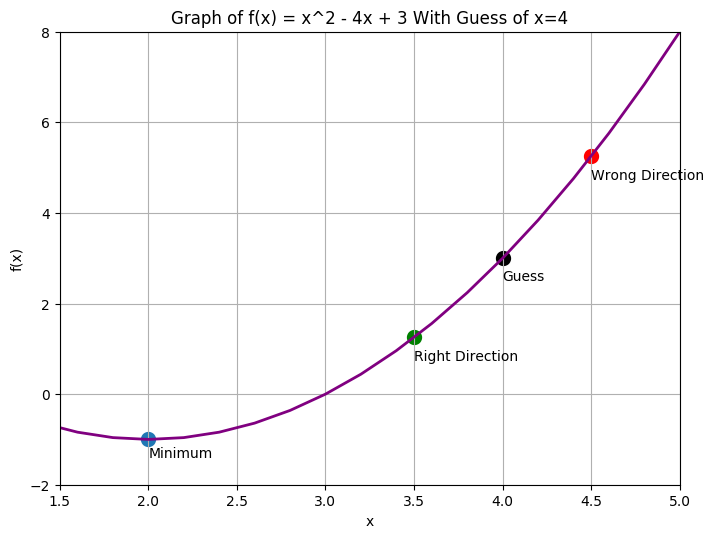

In [5]:
#####  Code for graph with initial guess and movement

# array of x values to plot, from -3 to 7
x_s = np.arange(-3., 7., 0.2)
# applying function to x values to find ys to graph
y_s = f(x_s)

# initializing figure, 8 by 6 inches
fig = plt.figure(figsize=(8, 6), dpi=100)

# adding axis labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 3 With Guess of x=4')
# adding gridlines for readability
plt.grid(True)

# zooming in
plt.xlim((1.5,5))
plt.ylim((-2,8))

# basic graphing format is plot(x, y), adding color and lw to thicken line
plt.plot(x_s, y_s, color ='purple', lw=2)

# overlaying a scatter plot of one point, our guess
plt.text(4, f(4)-0.5, r'Guess')
plt.scatter(4, f(4), color = 'black', linewidth=5)

# overlaying a scatter plot of one point, movement up
plt.text(4.5, f(4.5)- 0.5, r'Wrong Direction')
plt.scatter(4.5, f(4.5), color = 'red', linewidth=5)

# overlaying a scatter plot of one point, movement down
plt.text(3.5, f(3.5)- 0.5, r'Right Direction')
plt.scatter(3.5, f(3.5), color = 'green', linewidth=5)

# overlaying a scatter plot of one point, the minimum
plt.text(2, -1.4, r'Minimum')
plt.scatter(2, f(2), linewidth=5)

#plt.show()
# save command, to export graph to a file
plt.savefig('graph_with_movements.png')

In [6]:
# derivative function
def gradient(x):
    return (2*x -4)

# initial version of gradient algorithm
def gradient_descent(x, gradient, steps):
    # variables to keep track of our progress
    x_values = [x] 
    distance_from_last_guess = [] 
    
    for i in range(0,steps): 
        x_old = x
        x = x_old - derivative(x_old) 
        # appending to list to visualize progress
        x_values.append(x)
        distance_from_last_guess.append(x - x_old)
    
    return (x, x_values, distance_from_last_guess)

In [7]:
minimum, x_values, distance_from_last_guess = gradient_descent(4, derivative, 10)

print('Final guess: ' + str(minimum))
print('Sequence of guesses: ')
print(x_values)
print('Distance moved each geuss: ')
print(distance_from_last_guess)

Final guess: 4
Sequence of guesses: 
[4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4]
Distance moved each geuss: 
[-4, 4, -4, 4, -4, 4, -4, 4, -4, 4]


In [8]:
# second version of gradient algorithm, with step size specified
def gradient_descent2(x, derivative, steps, step_size):
    x_new = x
    # variables to keep track of our progress
    x_values = [x] 
    distance_from_last_guess = [] 
    for i in range(0,steps): 
        x_old = x_new
        x_new = x_old - step_size*derivative(x_old)  
        # appending to list to visualize progress
        x_values.append(x_new)
        distance_from_last_guess.append(x_new - x_old)
        
    return (x_new, x_values, distance_from_last_guess)

In [9]:
minimum, x_values, distance_from_last_guess = gradient_descent2(4, derivative, 10, 0.1)

print('Final guess: ' + str(minimum))
print('Sequence of guesses: ')
print([ '%.4f' % elem for elem in x_values]) #truncating to 4 digits for printing
print('Distance moved each guess: ')
print([ '%.4f' % elem for elem in distance_from_last_guess]) #truncating to 4 digits for printing

Final guess: 2.2147483647999997
Sequence of guesses: 
['4.0000', '3.6000', '3.2800', '3.0240', '2.8192', '2.6554', '2.5243', '2.4194', '2.3355', '2.2684', '2.2147']
Distance moved each guess: 
['-0.4000', '-0.3200', '-0.2560', '-0.2048', '-0.1638', '-0.1311', '-0.1049', '-0.0839', '-0.0671', '-0.0537']


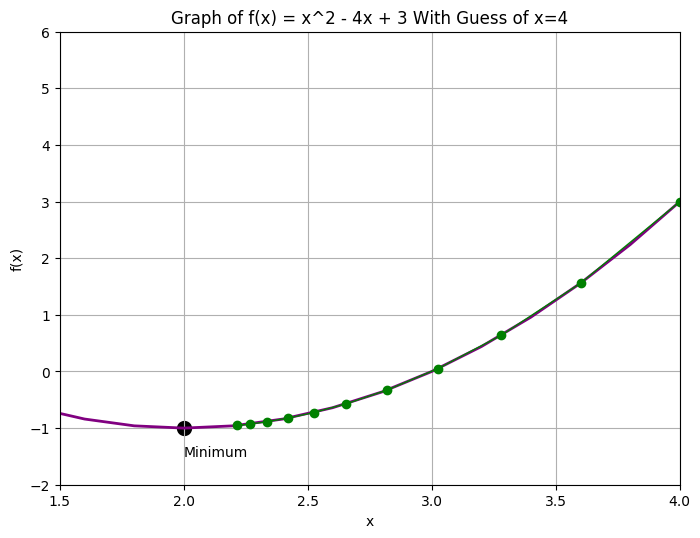

In [10]:
#####  Code for graph with movement

# array of x values to plot, from -3 to 7
x_s = np.arange(-3., 7., 0.2)
# applying function to x values to find ys to graph
y_s = f(x_s)

# initializing figure, 8 by 6 inches
fig = plt.figure(figsize=(8, 6), dpi=100)

# adding axis labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 3 With Guess of x=4')
# adding gridlines for readability
plt.grid(True)

# zooming in
plt.xlim((1.5,4))
plt.ylim((-2,6))

# basic graphing format is plot(x, y), adding color and lw to thicken line
plt.plot(x_s, y_s, color ='purple', lw=2)

# overlaid a scatter plot with our guess
plt.plot(x_values, [f(x) for x in x_values], color = 'green', linewidth=1, marker='o')

#marking answer on the graph
plt.text(2, f(2)-0.5, r'Minimum')
plt.scatter(2, f(2),  color = 'black', linewidth=5)

#plt.show()
# save command, to export graph to a file
plt.savefig('graph_gradient_descent.png')

In [11]:
# third version of gradient algorithm, with a tolerance specified

def gradient_descent3(x, derivative, tolerance, step_size):
    x_new = x
    x_old = x_new +  tolerance + 1 # to initialize the while loop
    # variables to keep track of our progress
    x_values = [x] 
    distance_from_last_guess = [] 
    
    # using absolute value to only consider magnitude
    while abs(x_new - x_old) > tolerance:
        x_old = x_new
        x_new = x_old - step_size*derivative(x_old)  
        # appending to list to visualize progress
        x_values.append(x_new)
        distance_from_last_guess.append(x_new - x_old)
        
    return (x_new, x_values, distance_from_last_guess)

In [12]:
minimum, x_values, distance_from_last_guess = gradient_descent3(4, derivative, 0.001, 0.1)

print('Final guess: ' + str(minimum))
print('Sequence of guesses: ')
print([ '%.4f' % elem for elem in x_values]) #truncating to 4 digits for printing
print('Distance moved each guess: ')
print([ '%.4f' % elem for elem in distance_from_last_guess]) #truncating to 4 digits for printing

Final guess: 2.003868562622767
Sequence of guesses: 
['4.0000', '3.6000', '3.2800', '3.0240', '2.8192', '2.6554', '2.5243', '2.4194', '2.3355', '2.2684', '2.2147', '2.1718', '2.1374', '2.1100', '2.0880', '2.0704', '2.0563', '2.0450', '2.0360', '2.0288', '2.0231', '2.0184', '2.0148', '2.0118', '2.0094', '2.0076', '2.0060', '2.0048', '2.0039']
Distance moved each guess: 
['-0.4000', '-0.3200', '-0.2560', '-0.2048', '-0.1638', '-0.1311', '-0.1049', '-0.0839', '-0.0671', '-0.0537', '-0.0429', '-0.0344', '-0.0275', '-0.0220', '-0.0176', '-0.0141', '-0.0113', '-0.0090', '-0.0072', '-0.0058', '-0.0046', '-0.0037', '-0.0030', '-0.0024', '-0.0019', '-0.0015', '-0.0012', '-0.0010']


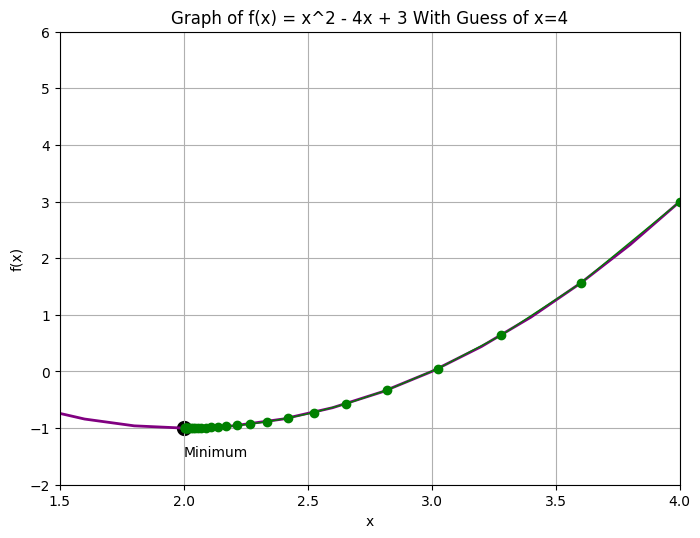

In [13]:
#####  Code for graph with movement

# array of x values to plot, from -3 to 7
x_s = np.arange(-3., 7., 0.2)
# applying function to x values to find ys to graph
y_s = f(x_s)

# initializing figure, 8 by 6 inches
fig = plt.figure(figsize=(8, 6), dpi=100)

# adding axis labels and title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^2 - 4x + 3 With Guess of x=4')
# adding gridlines for readability
plt.grid(True)

# zooming in
plt.xlim((1.5,4))
plt.ylim((-2,6))

# basic graphing format is plot(x, y), adding color and lw to thicken line
plt.plot(x_s, y_s, color ='purple', lw=2)

# overlaid a scatter plot with our guess
plt.plot(x_values, [f(x) for x in x_values], color = 'green', linewidth=1, marker='o')

#marking answer on the graph
plt.text(2, f(2)-0.5, r'Minimum')
plt.scatter(2, f(2),  color = 'black', linewidth=5)

#plt.show()
# save command, to export graph to a file
plt.savefig('graph_gradient_descent2.png')